# Import libraries

In [1]:
import os
import sys
import json
import csv

# numeric, scientific
from scipy import linalg as spla
import numpy as np

# plotting
%matplotlib inline
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt

# import Kitaev Honeycomb package
import kithcmb
from kithcmb import DisorderVortexSectors as vs

# import jsci, CT's enhanced json stream write package
import jsci
from jsci import WriteStream as jsciwrite
from jsci import Coding as jscicoding

# Define functions

Plot the real and imaginary parts of a complex matrix next to each other

In [2]:
def draw_real_imag_matrix(matrix_):
    plt.figure( figsize=(18,8) )

    plt.subplot(1, 2, 1)
    plt.imshow( np.real(matrix_).tolist() )
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow( np.imag(matrix_).tolist() )
    plt.colorbar()

    plt.show()

These functions show the spatial support of a given eigenstate over the honeycomb. The probability (mod squared amplitude) of the eigenstate at each black and white site is added together to give a square lattice of sites. 

The final function plots the spatial profile of the two eigenstates that together compose a single mode. (Near the middle of the spectrum, where you get extra degeneracy this might not work right.)

In [3]:
def get_spatial_matrix_elements(full_eigeninfo,state_,site_):
    return ( full_eigeninfo[1][site_+1][state_]*np.conjugate(full_eigeninfo[1][site_+1][state_]) + full_eigeninfo[1][site_][state_]*np.conjugate(full_eigeninfo[1][site_][state_]) )
    
def draw_spatial_eigenstate(full_eigeninfo,state_):
    spatial_eigenstate = [ [ get_spatial_matrix_elements(full_eigeninfo,state_,x + (y-1)*L ) for x in range(0,2*L,2) ] for y in range(L) ]
    draw_real_imag_matrix(spatial_eigenstate)
    
def draw_pair_states(full_eigeninfo,state_):
    # print full_eigeninfo[0][state_],' ',full_eigeninfo[0][2*L**2 -1 -state_]
    state1 = [ [ get_spatial_matrix_elements(full_eigeninfo,state_,x + (y-1)*2*L ) for x in range(0,2*L,2) ] for y in range(1,L+1) ]
    state2 = [ [ get_spatial_matrix_elements(full_eigeninfo,2*L**2 -1 -state_,x + (y-1)*2*L ) for x in range(0,2*L,2) ] for y in range(1,L+1) ]
    
    plt.figure( figsize=(18,8) )

    plt.subplot(1, 2, 1)
    plt.imshow( np.real(state1).tolist(), cmap='BuPu' )
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow( np.real(state2).tolist(), cmap='BuPu' )
    plt.colorbar()

    plt.show()

# Set system parameters and initialise 

In [4]:
L = 20
J = 1
kappa = 0.01

In [5]:
kh_sys = vs.DisorderVortexSectors(L,J,kappa,0.01,1.0)
#kh_sys.set_full_vortex_sector()
#kh_sys.set_tri_vortex_lattice( 2 )
kh_sys.disable_three_body_terms()
kh_sys.set_amplitude_disorder_random_vortex_configuration()

Print the disorder

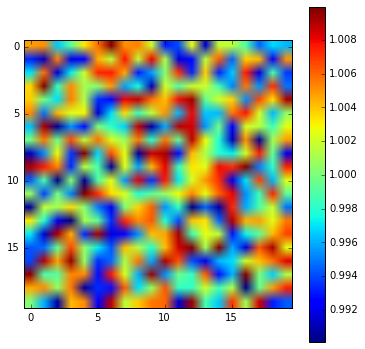

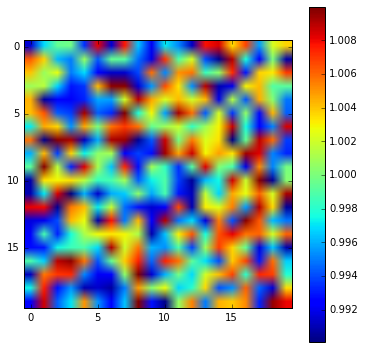

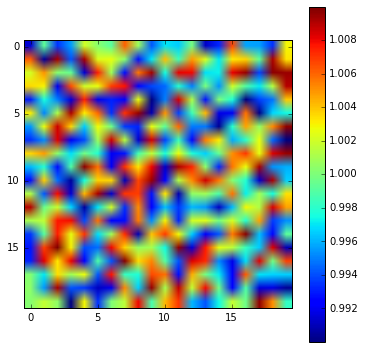

In [6]:
plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Jx)
plt.colorbar()
plt.show()

plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Jy)
plt.colorbar()
plt.show()

plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Jz)
plt.colorbar()
plt.show()

Print the A matrix

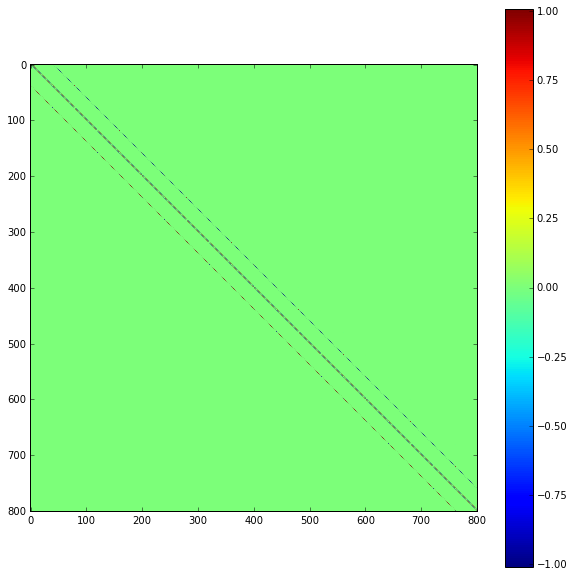

In [7]:
plt.figure( figsize=(10,10) )
plt.imshow(kh_sys.A - np.transpose(kh_sys.A))
plt.colorbar()
plt.show()

Set the spectrum to a fake very simple model spectrum

In [26]:
kh_sys.spectrum = [-3,-3,-2,-1,-0.002,0.002,1,2,3,3]

In [27]:
print kh_sys.get_log_partition_function(100.)
print kh_sys._compute_projected_log_partition_function(100.)[0]

450.698138869
449.9


In [28]:
print np.log(2) + np.log(2*np.cosh(0.5)) + np.log(2*np.cosh(1.))
print np.log( np.exp(1.+0.5) + np.exp(-1.+0.5) + np.exp(1.-0.5) + np.exp(-1.-0.5) )

2.63333687912
1.94018969856


In [29]:
print (kh_sys.get_log_partition_function(100.) - kh_sys._compute_projected_log_partition_function(100.)[0])/np.log(2)

1.1514709888
